Figuring out how to read/organize my files

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('src/haarcascade_frontalface_default.xml')
img = cv2.imread('data/ExtendedYaleB/yaleB11/yaleB11_P08A-070E+00.pgm')
faces = face_cascade.detectMultiScale(img, 1.1, 10 )
for (x,y, w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h),(0,255,0),2)
cv2.imshow('img', img)
cv2.waitKey(0)

In [49]:
archive = pd.read_csv('data/fer2013.csv')
archive['image'] = archive['pixels'].apply(lambda x: np.array(x.split()).astype(int).reshape(48,48))

In [70]:
em_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
em_indices = []
for i in range(7):
    em_indices.append(archive[archive['emotion']==i].index)

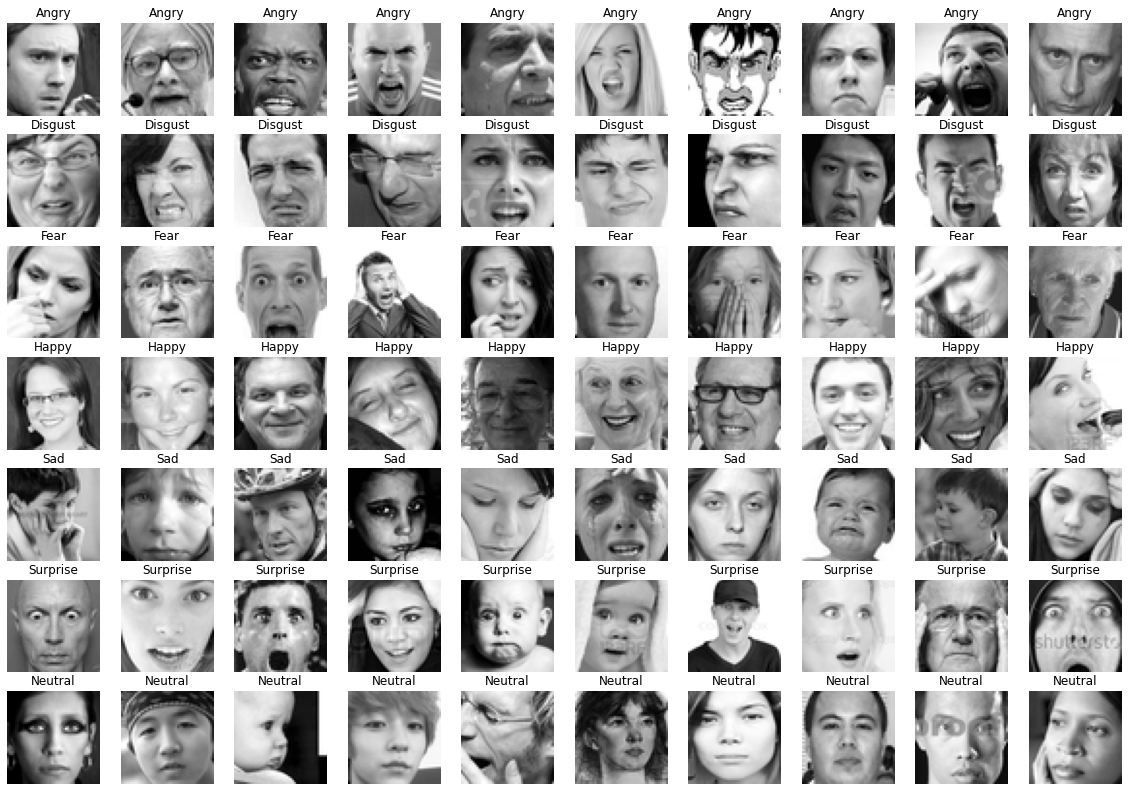

In [72]:
fig,ax = plt.subplots(7,10, figsize=(20,14))
[ax.set_axis_off() for ax in ax.ravel()]
for rm in range(7):
    for axi, i in enumerate(em_indices[j][:10]):
        ax[em,axi].imshow(archive.image[i],cmap='gray')
        ax[j,axi].set_title(em_labels[j])